In [1]:
import cv2
import os
import math
import glob
import mayavi
import PyQt5
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import convolve2d as c2d

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [11]:
cf = glob.glob('calibration_images_folder_path/*.jpg')

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((7*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:7].T.reshape(-1, 2)

objpoints = []
imgpoints = []

for chessboard in cf:
    chessimg = cv2.imread(chessboard)
    chessimg = cv2.resize(chessimg, (1000, 1000))
    graychess = cv2.cvtColor(chessimg, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(graychess, (7, 7), None)

    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(graychess,corners, (5,5), (-1,-1), criteria)
        imgpoints.append(corners2)

        cv2.drawChessboardCorners(chessimg, (7, 7), corners, ret)
        cv2.imshow('Chessboard Corners', chessimg)
        cv2.waitKey(500)

cv2.destroyAllWindows()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, graychess.shape[::-1], None, None)

focal_length = mtx[0, 0]
principal_point = (mtx[0, 2], mtx[1, 2])

print("Focal Length:", focal_length)
print("Principal Point:", principal_point)
print('Camera matrix:\n', mtx)

K = mtx

Focal Length: 4153.2011256209125
Principal Point: (447.6798199076664, 449.99649379681523)
Camera matrix:
 [[4.15320113e+03 0.00000000e+00 4.47679820e+02]
 [0.00000000e+00 3.07584581e+03 4.49996494e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


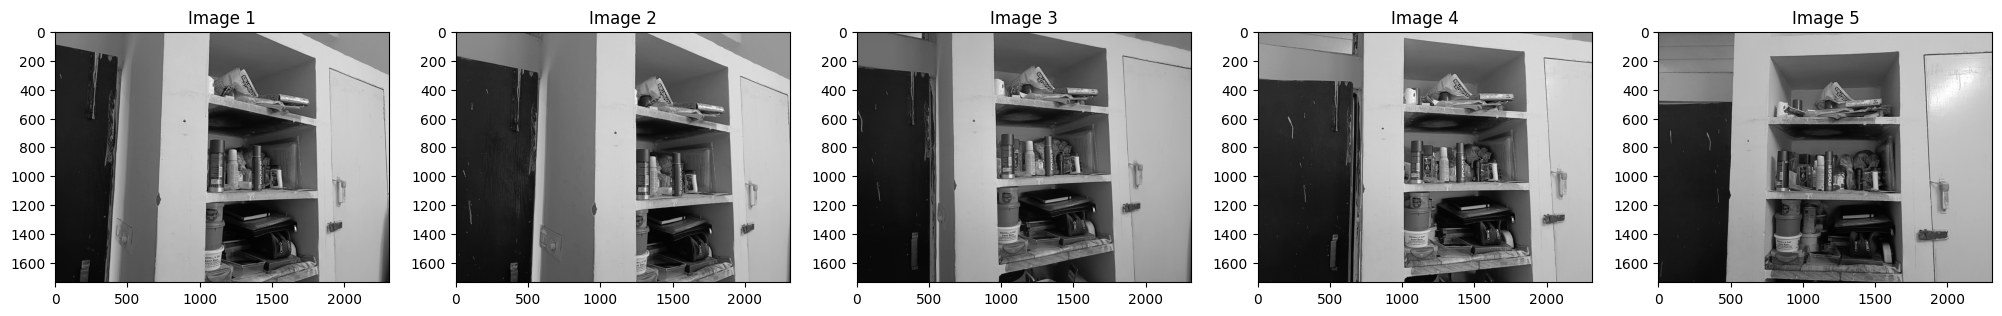

In [12]:
im1_path = "test_image_path1.jpg"
im2_path = "test_image_path2.jpg"
im3_path = "test_image_path3.jpg"
im4_path = "test_image_path4.jpg"
im5_path = "test_image_path5.jpg"

im_paths = []
im_paths.append(im1_path)
im_paths.append(im2_path)
im_paths.append(im3_path)
im_paths.append(im4_path)
im_paths.append(im5_path)

# Load images
img1 = cv2.imread(im1_path)
img2 = cv2.imread(im2_path)
img3 = cv2.imread(im3_path)
img4 = cv2.imread(im4_path)
img5 = cv2.imread(im5_path)

width = int(img1.shape[1]/2)
height = int(img1.shape[0]/2)

img1 = cv2.resize(img1, (width, height))
img2 = cv2.resize(img2, (width, height))
img3 = cv2.resize(img3, (width, height))
img4 = cv2.resize(img4, (width, height))
img5 = cv2.resize(img5, (width, height))

img = []
img.append(img1)
img.append(img2)
img.append(img3)
img.append(img4)
img.append(img5)

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

# Plot the images
plt.figure(figsize=(25, 5))

plt.subplot(1, 5, 1)
plt.imshow(gray1, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 5, 2)
plt.imshow(gray2, cmap='gray')
plt.title('Image 2')

plt.subplot(1, 5, 3)
plt.imshow(gray3, cmap='gray')
plt.title('Image 3')

plt.subplot(1, 5, 4)
plt.imshow(gray4, cmap='gray')
plt.title('Image 4')

plt.subplot(1, 5, 5)
plt.imshow(gray5, cmap='gray')
plt.title('Image 5')

plt.show()

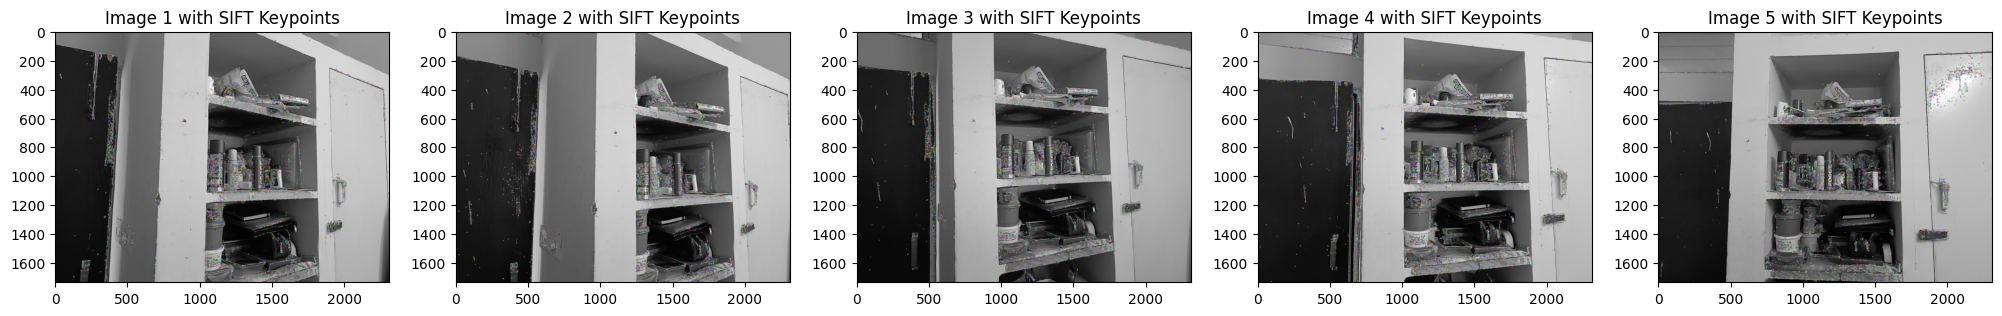

In [13]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)
keypoints3, descriptors3 = sift.detectAndCompute(gray3, None)
keypoints4, descriptors4 = sift.detectAndCompute(gray4, None)
keypoints5, descriptors5 = sift.detectAndCompute(gray5, None)

keypoints = []
keypoints.append(keypoints1)
keypoints.append(keypoints2)
keypoints.append(keypoints3)
keypoints.append(keypoints4)
keypoints.append(keypoints5)

descriptors = []
descriptors.append(descriptors1)
descriptors.append(descriptors2)
descriptors.append(descriptors3)
descriptors.append(descriptors4)
descriptors.append(descriptors5)

gray_images = []
gray_images.append(gray1)
gray_images.append(gray2)
gray_images.append(gray3)
gray_images.append(gray4)
gray_images.append(gray5)

# Draw keypoints on the images
img1_with_keypoints = cv2.drawKeypoints(gray1, keypoints1, img1.copy())
img2_with_keypoints = cv2.drawKeypoints(gray2, keypoints2, img2.copy())
img3_with_keypoints = cv2.drawKeypoints(gray3, keypoints3, img3.copy())
img4_with_keypoints = cv2.drawKeypoints(gray4, keypoints4, img4.copy())
img5_with_keypoints = cv2.drawKeypoints(gray5, keypoints5, img5.copy())

# Plot the images with keypoints
plt.figure(figsize=(25, 5))

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(img1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with SIFT Keypoints')

plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(img2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with SIFT Keypoints')

plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(img3_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 3 with SIFT Keypoints')

plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(img4_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 4 with SIFT Keypoints')

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(img5_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 5 with SIFT Keypoints')

plt.show()

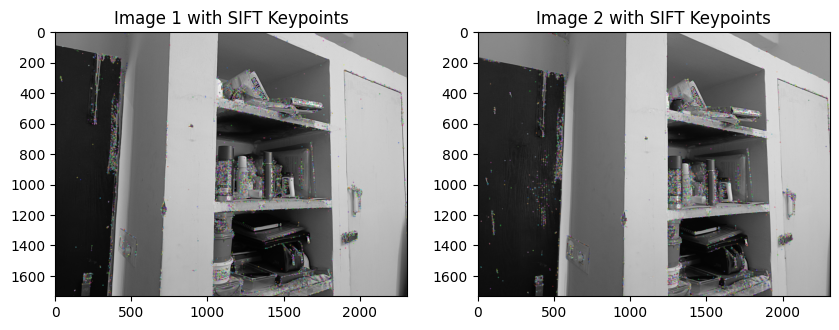

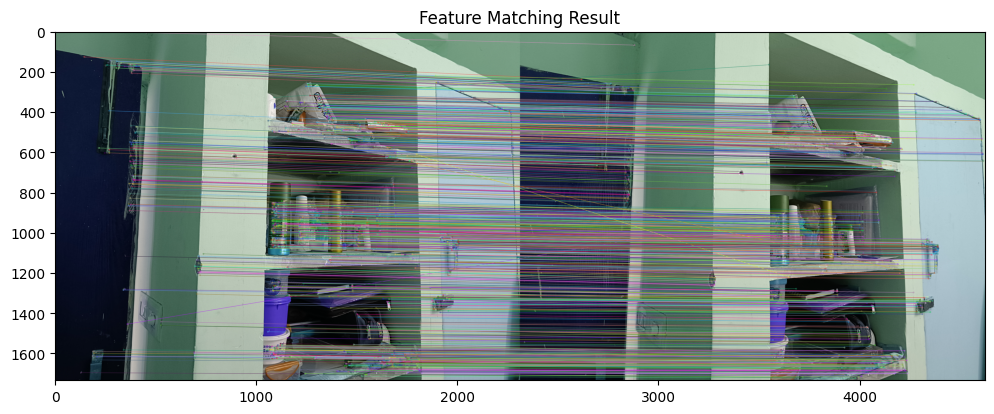

In [ ]:
#use flann to perform feature matching
FLANN_INDEX_KDTREE = 0        #FLANN (Fast Library for Approximate Nearest Neighbors)
index_params_sift = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)   
search_params_sift = dict(checks = 50)  #50 iterations to search for the best match
flann_sift = cv2.FlannBasedMatcher(index_params_sift, search_params_sift) 
matches = flann_sift.knnMatch(descriptors1,descriptors2,k=2)  #2-nearest neighbour for each descriptor

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)

img1copy = cv2.imread(im1_path)
img2copy = cv2.imread(im2_path)
img1copy = cv2.resize(img1copy, (width, height))
img2copy = cv2.resize(img2copy, (width, height))

MIN_MATCH_COUNT = 3   #minimum number of matches required to find the object (More the better)

if len(good_matches)>MIN_MATCH_COUNT:
    p1_sift = np.float32([ keypoints1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)   #get the keypoints corresponding to the each good match for Image1
    p2_sift = np.float32([ keypoints2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)   #for Image 2

E, mask = cv2.findEssentialMat(p1_sift, p2_sift, K, cv2.RANSAC, 0.999, 1.0)
matchesMask = mask.ravel().tolist()

points, R_sift, t_sift, mask = cv2.recoverPose(E, p1_sift, p2_sift)

# Draw matches
matched_img = cv2.drawMatches(img1copy, keypoints1, img2copy, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plot the images with keypoints
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with SIFT Keypoints')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with SIFT Keypoints')
plt.show()

# Plot the matches
plt.figure(figsize=(12, 6))
plt.imshow(matched_img)
plt.title('Feature Matching Result')
plt.show()

In [8]:
M_l = np.hstack((np.eye(3, 3), np.zeros((3, 1))))
M_r = np.hstack((R_sift, t_sift))

P_l = np.dot(K,  M_l)
P_r = np.dot(K,  M_r)

p1 = p1_sift[np.asarray(matchesMask)==1,:,:]
p2 = p2_sift[np.asarray(matchesMask)==1,:,:]

p1_un = cv2.undistortPoints(p1,K,None)
p2_un = cv2.undistortPoints(p2,K,None)

p1_un = np.squeeze(p1_un)
p2_un = np.squeeze(p2_un)

points_4d_hom = cv2.triangulatePoints(P_l, P_r, p1_un.T, p2_un.T)
points_3d = points_4d_hom / np.tile(points_4d_hom[-1, :], (4, 1))
points_3d = points_3d[:3, :].T

# Print the 3D points (x, y, z)
print("3D Points:")
for i, point in enumerate(points_3d):
    print(f"Point {i + 1}: {point}")

3D Points:
Point 1: [  1.9270111   2.6779919 -17.994598 ]
Point 2: [  1.9264848   2.6756003 -17.992468 ]
Point 3: [  1.9263618   2.6765757 -17.992857 ]
Point 4: [  1.9263622   2.6765604 -17.992872 ]
Point 5: [  1.92636     2.6765559 -17.992868 ]
Point 6: [  1.926257    2.6767113 -17.993248 ]
Point 7: [  1.9262568   2.6766827 -17.993248 ]
Point 8: [  1.9262522   2.6766865 -17.99324  ]
Point 9: [  1.9262527   2.6766868 -17.993246 ]
Point 10: [  1.9262677   2.6750448 -17.993591 ]
Point 11: [  1.9262413   2.676961  -17.993288 ]
Point 12: [  1.9262415   2.6769106 -17.993315 ]
Point 13: [  1.9263002   2.6749268 -17.993998 ]
Point 14: [  1.9263002   2.6749268 -17.993998 ]
Point 15: [  1.9262974   2.6749537 -17.993982 ]
Point 16: [  1.9262978   2.674921  -17.994001 ]
Point 17: [  1.9262978   2.674921  -17.994001 ]
Point 18: [  1.9262966   2.6749778 -17.99399  ]
Point 19: [  1.9262977   2.6749332 -17.994005 ]
Point 20: [  1.9262946   2.6749177 -17.994003 ]
Point 21: [  1.9262943   2.67494   -17



Processing for Image 1 and Image 2


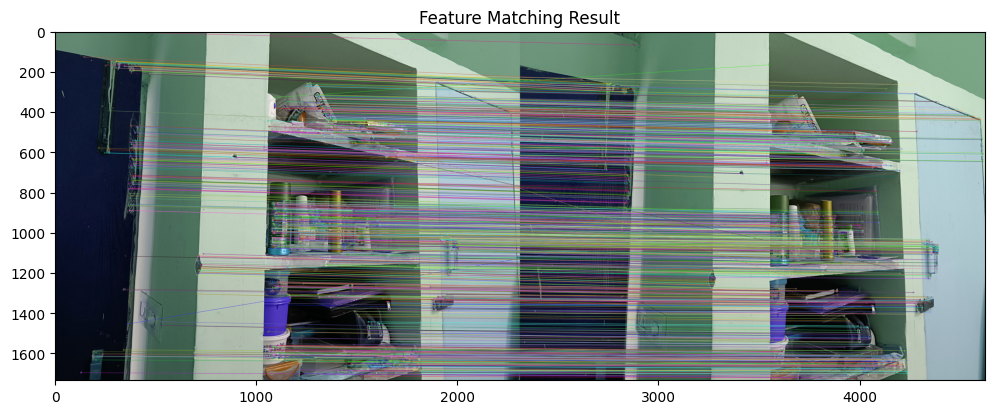

3D points calculated
3D points saved as point_cloud_0_1.ply


Processing for Image 1 and Image 3


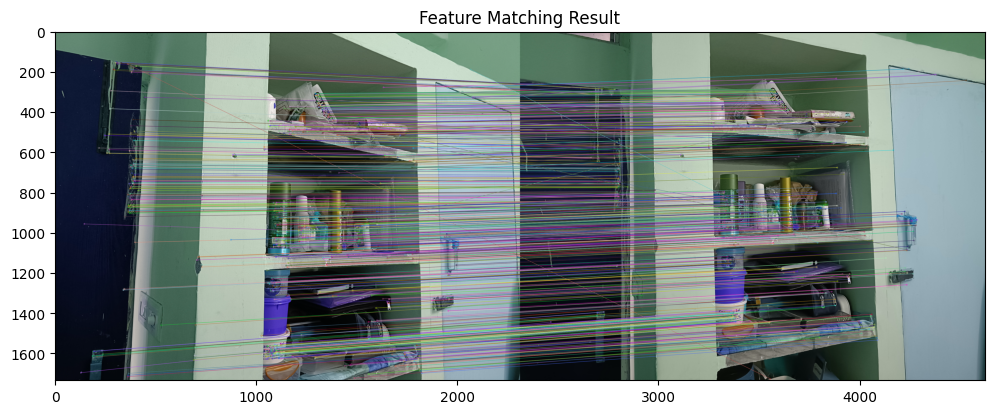

3D points calculated
3D points saved as point_cloud_0_2.ply


Processing for Image 1 and Image 4


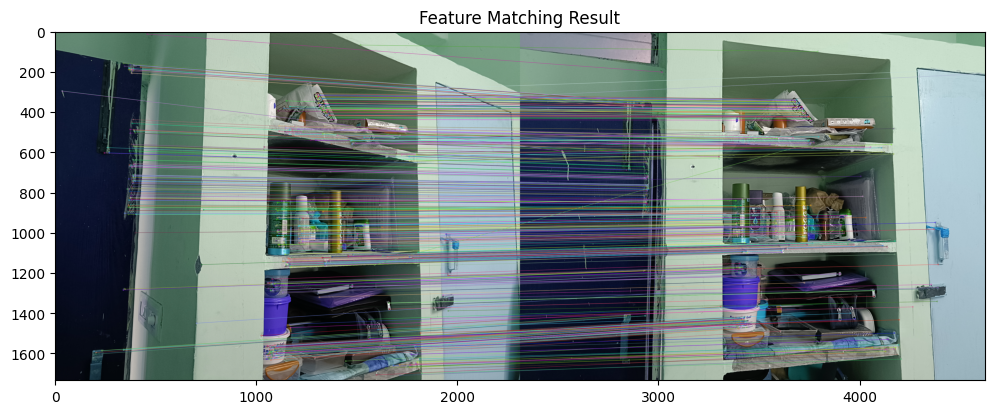

3D points calculated
3D points saved as point_cloud_0_3.ply


Processing for Image 1 and Image 5


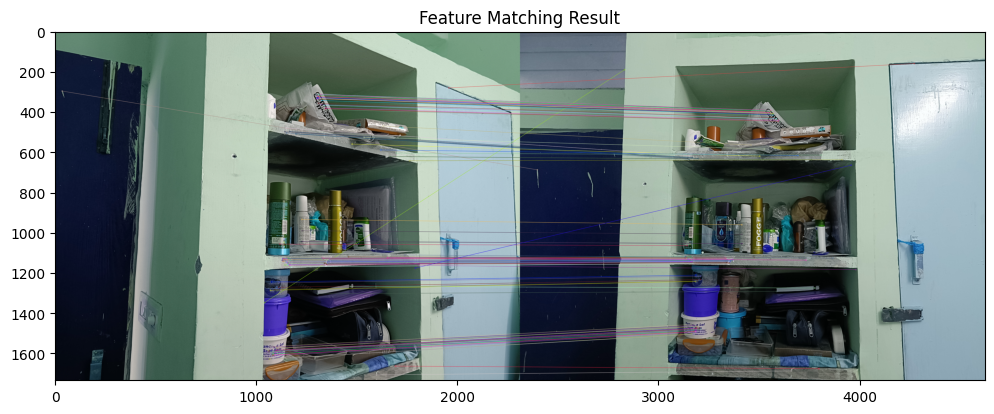

3D points calculated
3D points saved as point_cloud_0_4.ply


Processing for Image 2 and Image 3


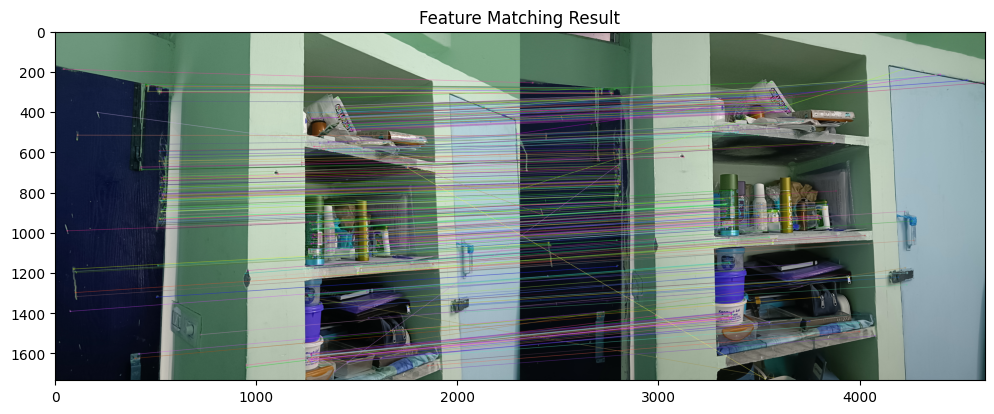

3D points calculated
3D points saved as point_cloud_1_2.ply


Processing for Image 2 and Image 4


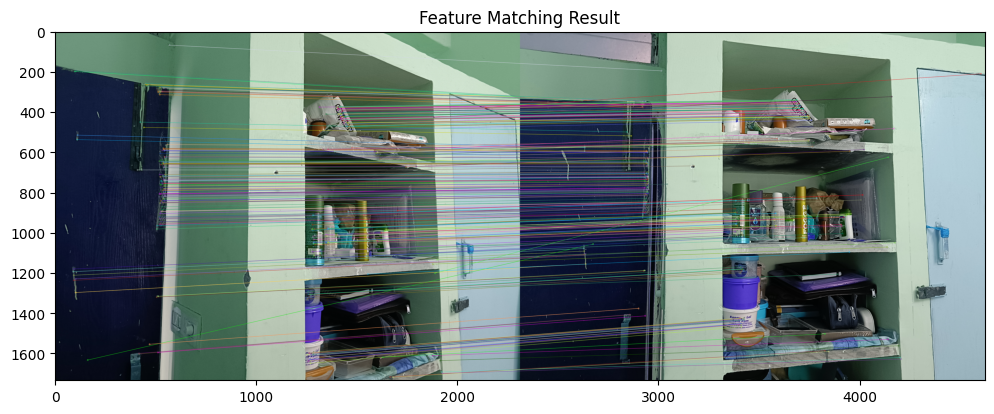

3D points calculated
3D points saved as point_cloud_1_3.ply


Processing for Image 2 and Image 5


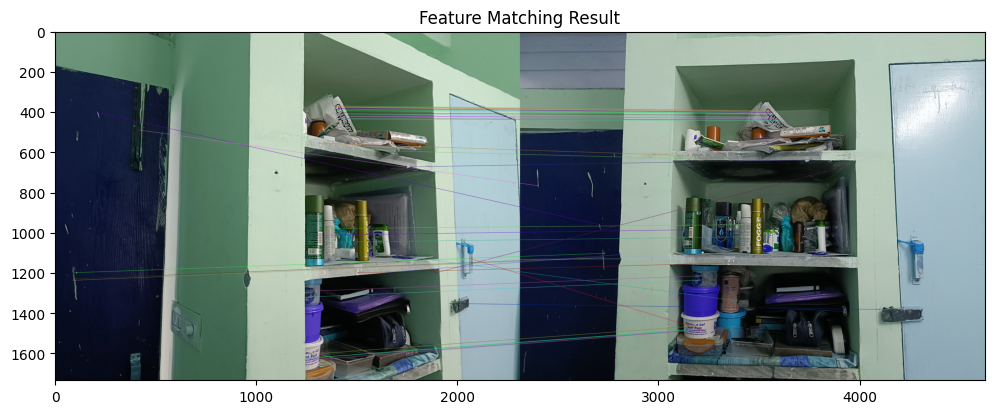

3D points calculated
3D points saved as point_cloud_1_4.ply


Processing for Image 3 and Image 4


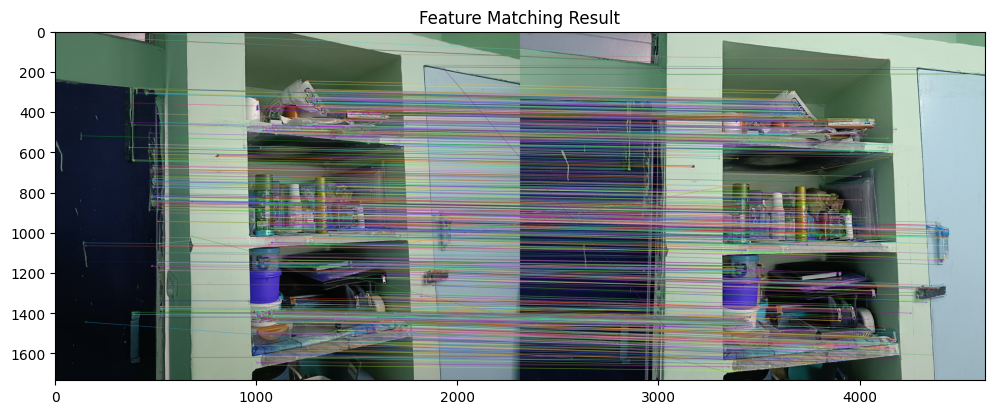

3D points calculated
3D points saved as point_cloud_2_3.ply


Processing for Image 3 and Image 5


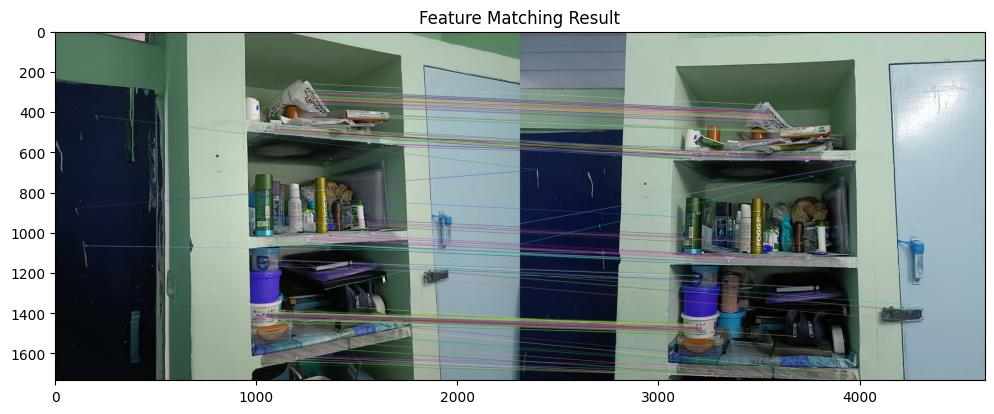

3D points calculated
3D points saved as point_cloud_2_4.ply


Processing for Image 4 and Image 5


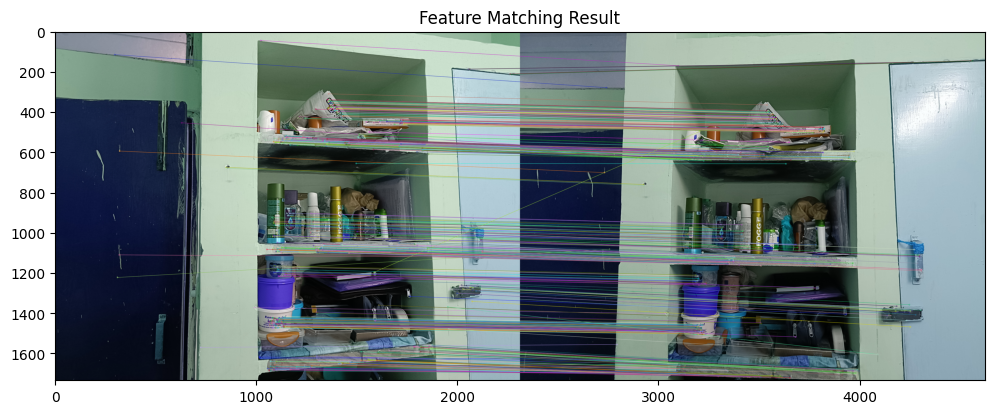

3D points calculated
3D points saved as point_cloud_3_4.ply
All point clouds processed and saved.


In [9]:
# fig = mlab.figure(bgcolor=(0, 0, 0))
# mlab.title('3D Point Cloud Visualization')

# Initialize lists to store all triangulated points
all_points = []

for i in range(5):
    for j in range(i+1, 5):
        if(i==j):
            continue

        print("\n\nProcessing for Image", i+1, "and Image", j+1)
        #use flann to perform feature matching
        FLANN_INDEX_KDTREE = 0        #FLANN (Fast Library for Approximate Nearest Neighbors)
        index_params_sift = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)   
        search_params_sift = dict(checks = 50)  #50 iterations to search for the best match
        flann_sift = cv2.FlannBasedMatcher(index_params_sift, search_params_sift) 
        matches = flann_sift.knnMatch(descriptors[i],descriptors[j],k=2)  #2-nearest neighbour for each descriptor

        # Apply ratio test
        good_matches = []
        for m, n in matches:
            if m.distance < 0.6 * n.distance:
                good_matches.append(m)

        img1copy = cv2.imread(im_paths[i])
        img2copy = cv2.imread(im_paths[j])
        img1copy = cv2.resize(img1copy, (width, height))
        img2copy = cv2.resize(img2copy, (width, height))

        MIN_MATCH_COUNT = 3   #minimum number of matches required to find the object (More the better)

        if len(good_matches)>MIN_MATCH_COUNT:
            p1_sift = np.float32([ keypoints[i][m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)   #get the keypoints corresponding to the each good match for Image1
            p2_sift = np.float32([ keypoints[j][m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)   #for Image 2

        E, mask = cv2.findEssentialMat(p1_sift, p2_sift, K, cv2.RANSAC, 0.999, 1.0)
        matchesMask = mask.ravel().tolist()

        points, R_sift, t_sift, mask = cv2.recoverPose(E, p1_sift, p2_sift, K)

        # Draw matches
        matched_img = cv2.drawMatches(img1copy, keypoints[i], img2copy, keypoints[j], good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Plot the matches
        plt.figure(figsize=(12, 6))
        plt.imshow(matched_img)
        plt.title('Feature Matching Result')
        plt.show()

        M_l = np.hstack((np.eye(3, 3), np.zeros((3, 1))))
        M_r = np.hstack((R_sift, t_sift))

        P_l = np.dot(K,  M_l)
        P_r = np.dot(K,  M_r)

        p1 = p1_sift[np.asarray(matchesMask)==1,:,:]
        p2 = p2_sift[np.asarray(matchesMask)==1,:,:]

        p1_un = cv2.undistortPoints(p1,K,None)
        p2_un = cv2.undistortPoints(p2,K,None)

        p1_un = np.squeeze(p1_un)
        p2_un = np.squeeze(p2_un)

        points_4d_hom = cv2.triangulatePoints(P_l, P_r, p1_un.T, p2_un.T)
        points_3d = points_4d_hom / np.tile(points_4d_hom[-1, :], (4, 1))
        points_3d = points_3d[:3, :].T

        print("3D points calculated")

        x = points_3d[:, 0]
        y = points_3d[:, 1]
        z = points_3d[:, 2]

        # points = mlab.points3d(x, y, z, mode='point', color=(1, 1, 1), scale_factor=1)

        # Adjust camera position
        # camera_pos = -R_sift.T @ t_sift
        # camera_up = np.array([0, -1, 0])  # Up vector

        # print("Camera Pose and Camera Up matrices calculated")

        # mlab.view(azimuth=0, elevation=90, distance=focal_length*5, focalpoint=camera_pos.ravel(), figure=fig, roll=0)
        # print("Camera view adjusted")

        # # Show the scene
        # mlab.draw()

        output_file = f"point_cloud_{i}_{j}.ply"
        with open(output_file, "w") as f:
            f.write("ply\n")
            f.write("format ascii 1.0\n")
            f.write(f"element vertex {points_3d.shape[0]}\n")
            f.write("property float x\n")
            f.write("property float y\n")
            f.write("property float z\n")
            f.write("end_header\n")
            for point in points_3d:
                f.write(f"{point[0]} {point[1]} {point[2]}\n")

        print("3D points saved as", output_file)

print("All point clouds processed and saved.")
# mlab.show()